In [1]:
import os
import sys
import json
import argparse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

from glob import glob
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm.second_level import make_second_level_design_matrix
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

In [2]:
from nilearn import plotting, datasets, surface

# for plotting slices
mni152_template = datasets.load_mni152_template(resolution=1)
# for plotting on surface
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

[get_dataset_dir] Dataset found in /ihome/bchandrasekaran/krs228/nilearn_data/fsaverage


In [3]:
task_label = 'badaga'
contrast_label = 'sound'
fwhm = 6.00
space_label = 'MNI152NLin2009cAsym'

# define data directories
bidsroot = os.path.join('/bgfs/bchandrasekaran/krs228/data/', 
                        'SSP/',
                        'data_bids',
                       )
nilearn_dir = os.path.join(bidsroot, 'derivatives', 'nilearn')

# define first-level directory where group-level inputs will be pulled from
l1_dir = os.path.join(nilearn_dir, 'run-all')

# create output directory
group_out_dir = os.path.join(nilearn_dir, 'group_run-all')
if not os.path.exists(group_out_dir):
        os.makedirs(group_out_dir)

# Plot first-level images

In [4]:
'''
sub_list = ['sub-SSP009', 'sub-SSP011', 
            'sub-SSP017', 'sub-SSP018',
            'sub-SSP020', 
           ]
'''

"\nsub_list = ['sub-SSP009', 'sub-SSP011', \n            'sub-SSP017', 'sub-SSP018',\n            'sub-SSP020', \n           ]\n"

In [5]:
sub_list = [os.path.basename(x) for x in sorted(glob(l1_dir+'/sub*'))]
print(sub_list)

['sub-SSP009', 'sub-SSP011', 'sub-SSP017', 'sub-SSP018', 'sub-SSP020', 'sub-SSP028', 'sub-SSP032', 'sub-SSP033', 'sub-SSP034', 'sub-SSP036', 'sub-SSP038', 'sub-SSP039', 'sub-SSP041', 'sub-SSP045', 'sub-SSP046', 'sub-SSP048', 'sub-SSP051', 'sub-SSP054']


In [ ]:
contrast_label = 'sound'

for sub_id in sub_list:
    sub_fpath = os.path.join(l1_dir, sub_id,
                             f'{sub_id}_task-{task_label}_fwhm-6_'+
                             f'contrast-{contrast_label}_stat-z_statmap.nii.gz')

    sub_img = nib.load(sub_fpath)

    title=f'{sub_id} task-{task_label} contrast-{contrast_label}'
    plotting.plot_stat_map(sub_img, #thresholded_map, 
                           threshold=2., # threshold
                           bg_img=mni152_template,
                           cut_coords=[-49, -22, 8],
                           black_bg=False,
                           title=title)

In [ ]:
contrast_label = 'response'

for sub_id in sub_list:
    sub_fpath = os.path.join(l1_dir, sub_id,
                             f'{sub_id}_task-{task_label}_fwhm-6_'+
                             f'contrast-{contrast_label}_stat-z_statmap.nii.gz')

    sub_img = nib.load(sub_fpath)

    title=f'{sub_id} task-{task_label} contrast-{contrast_label}'
    plotting.plot_stat_map(sub_img, #thresholded_map, 
                           threshold=2., # threshold
                           bg_img=mni152_template,
                           cut_coords=[-32, -22, 58],
                           black_bg=False,
                           title=title)

## Plot contrasts side-by-side per participant

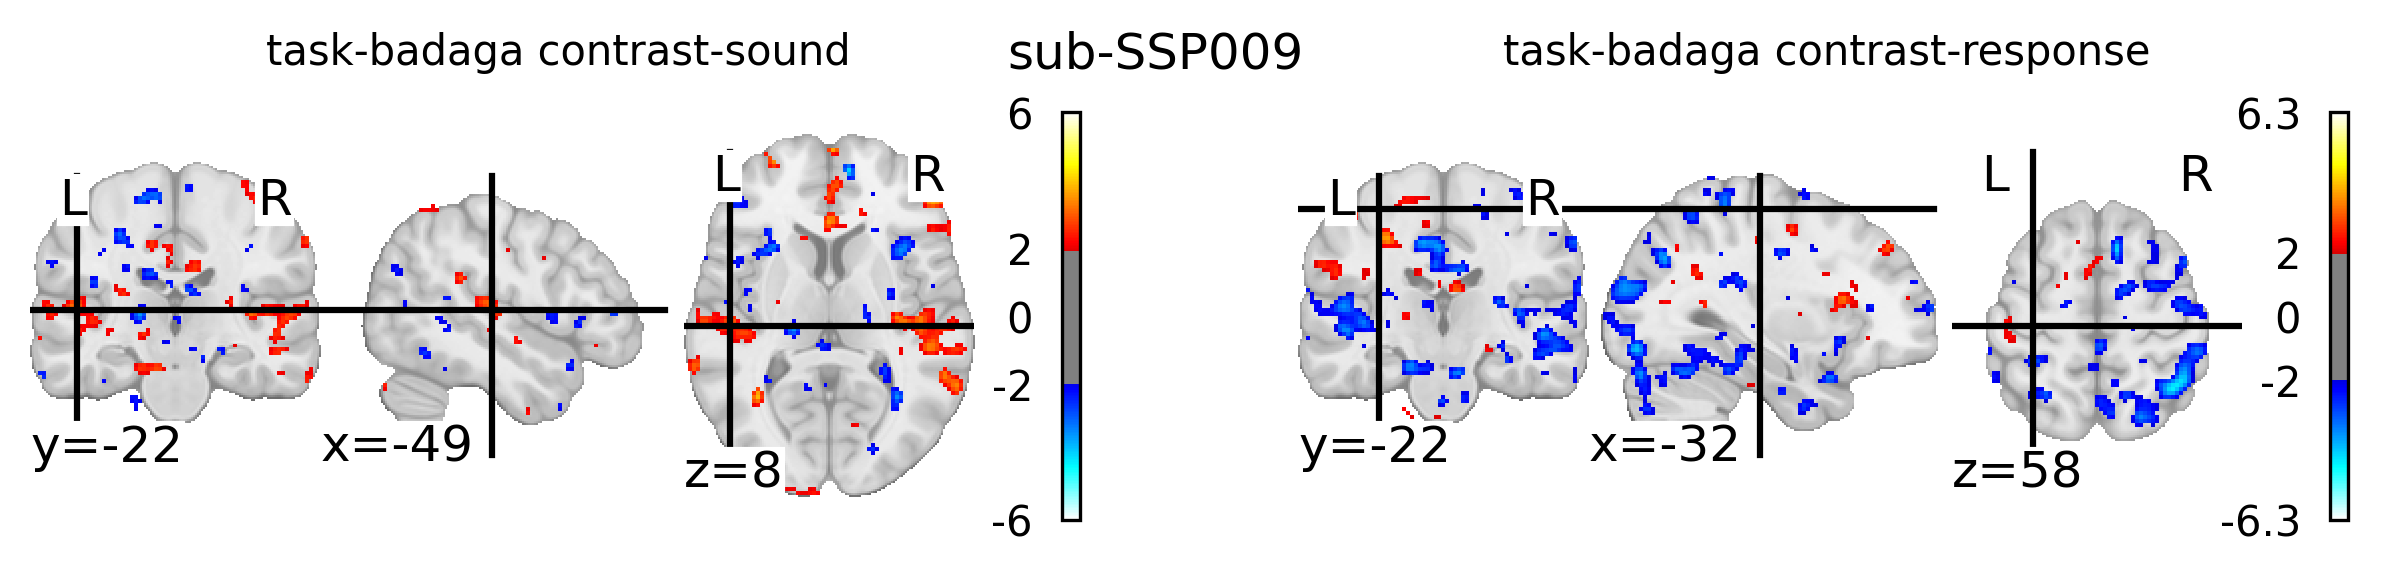

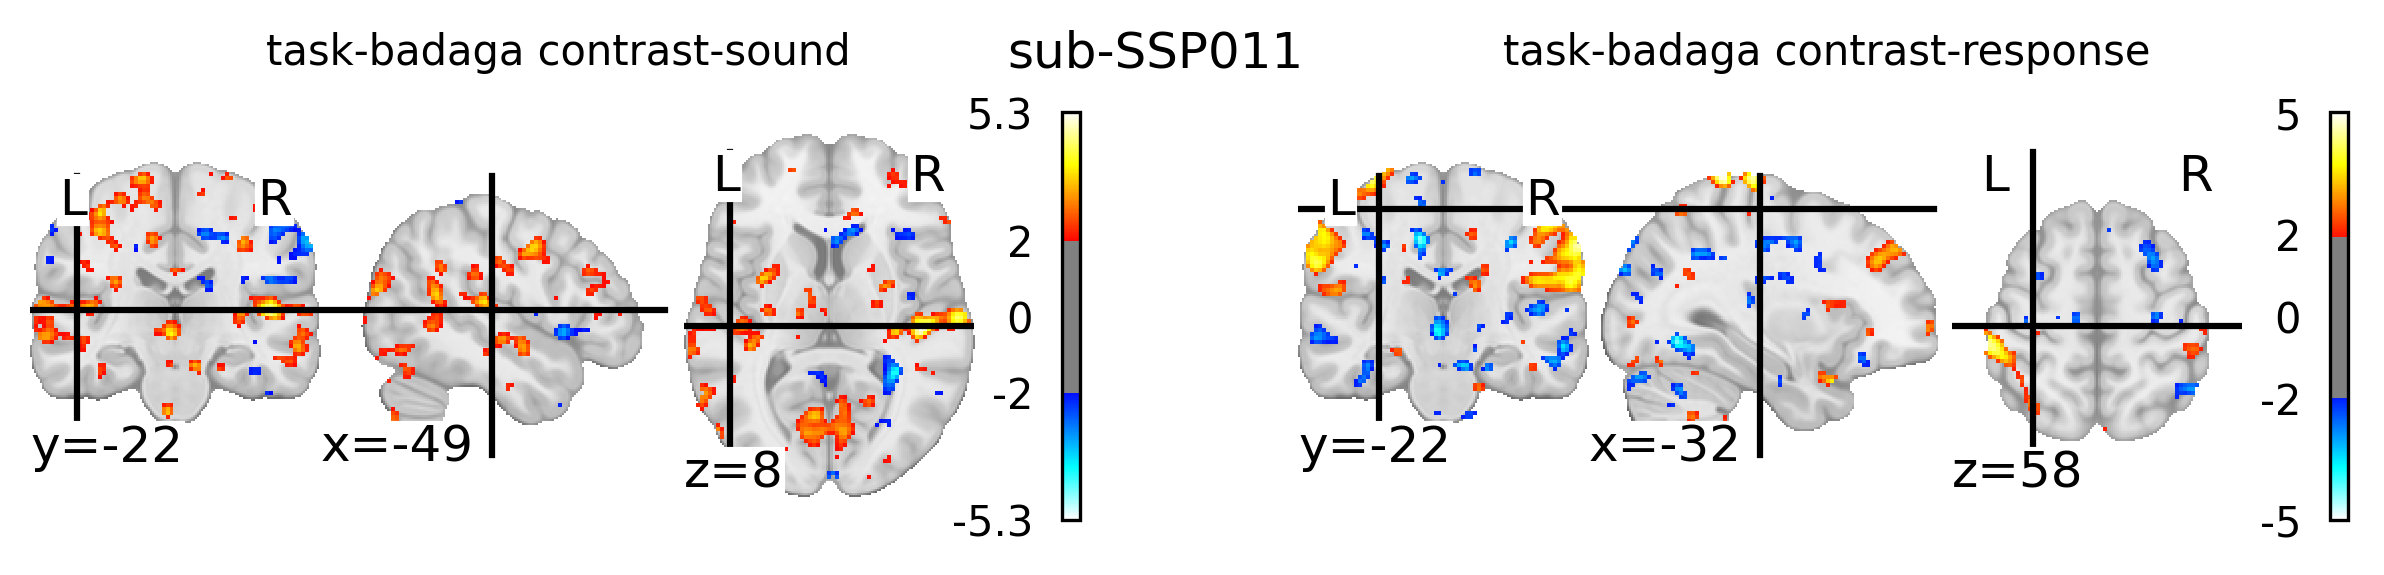

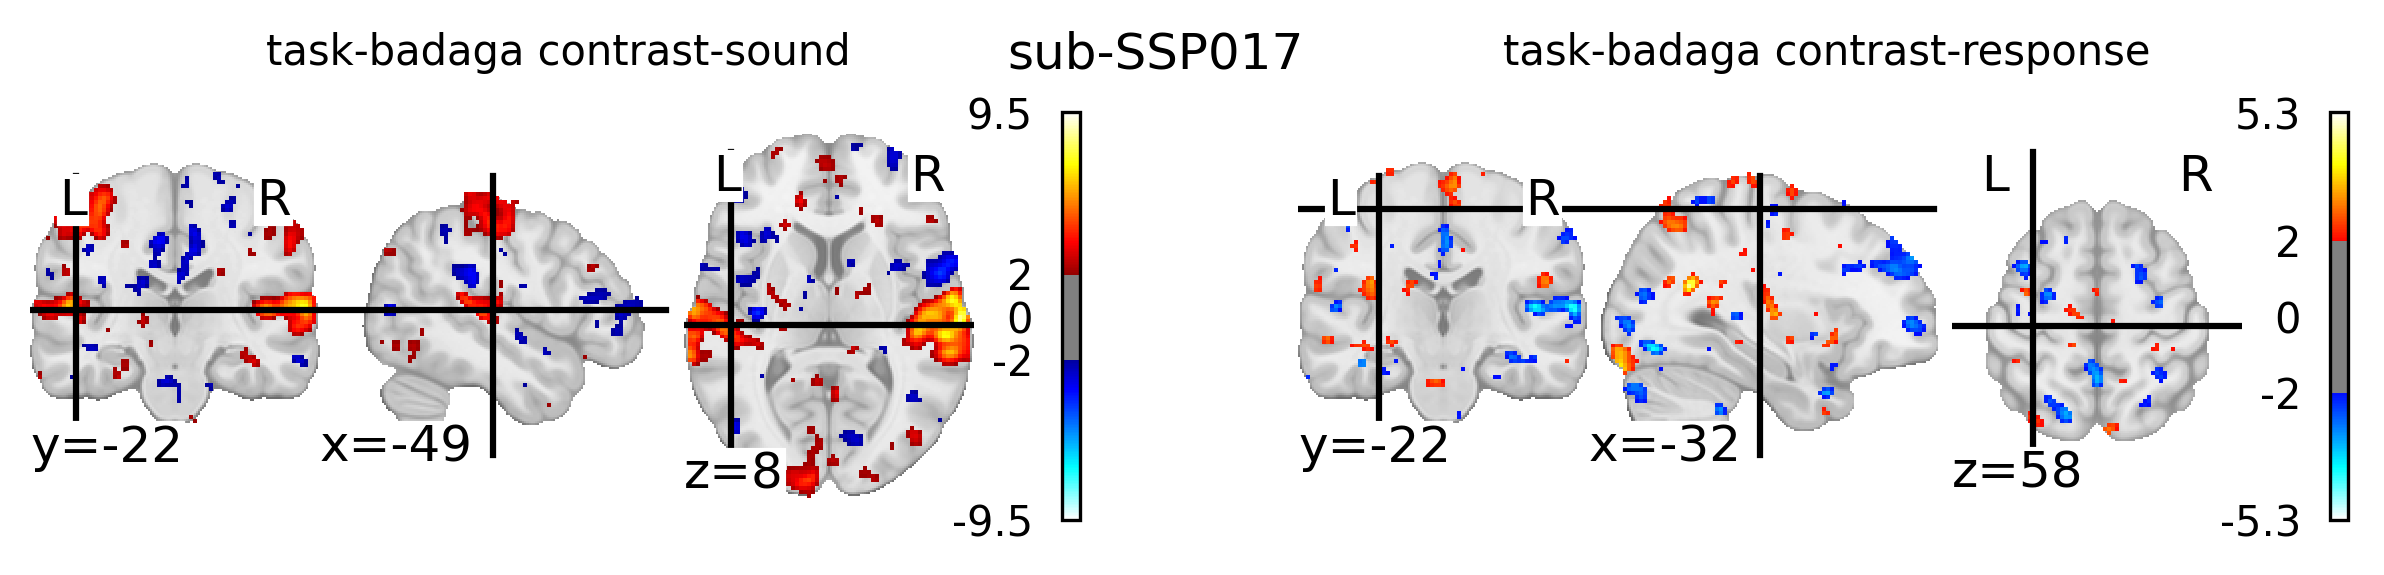

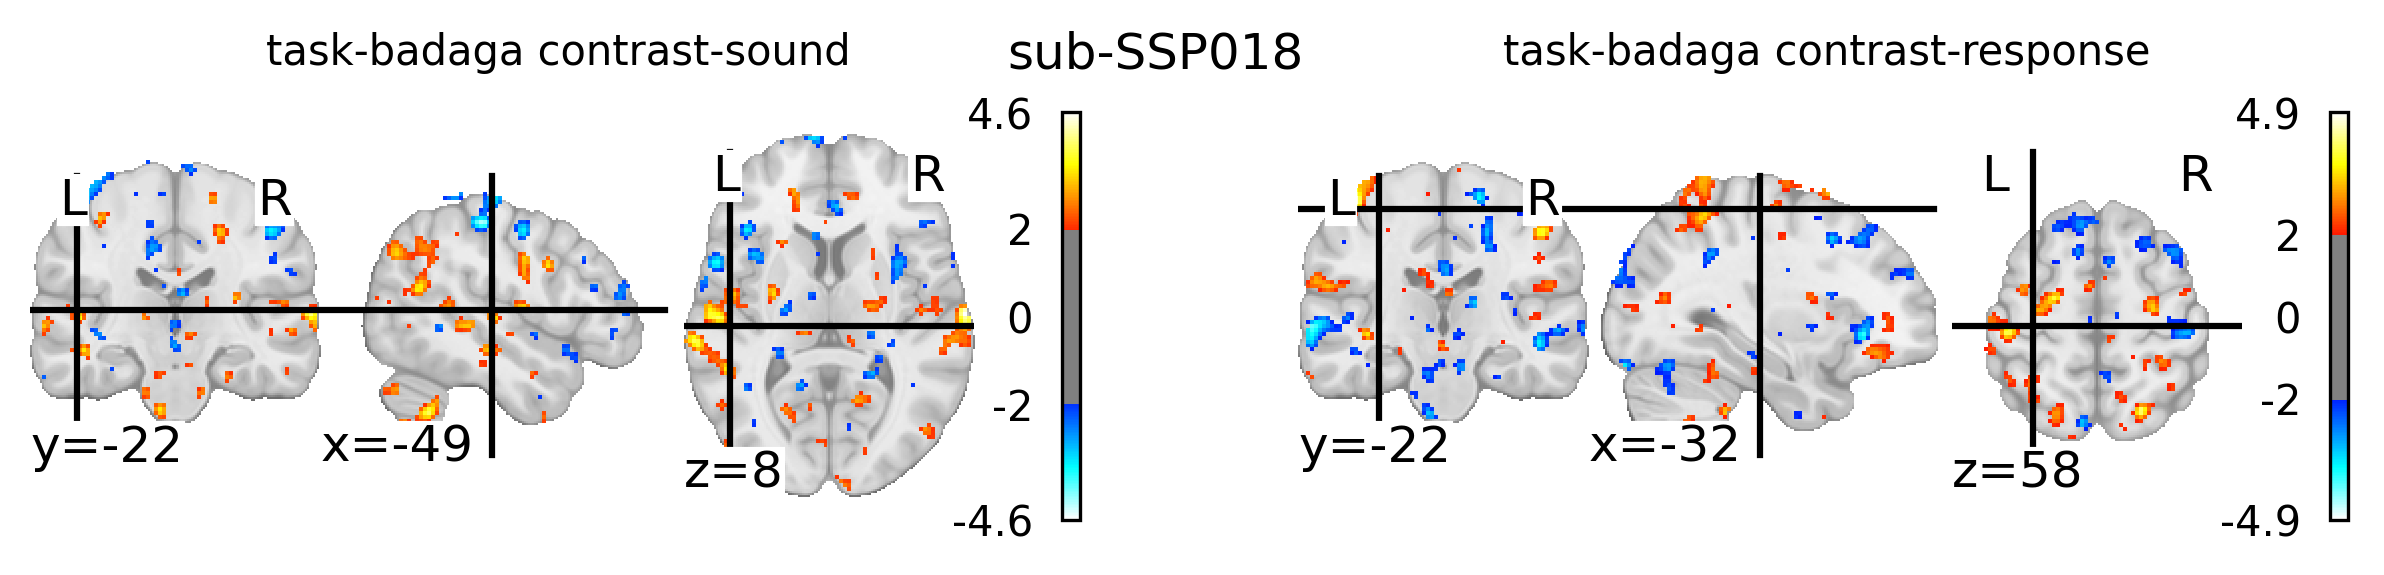

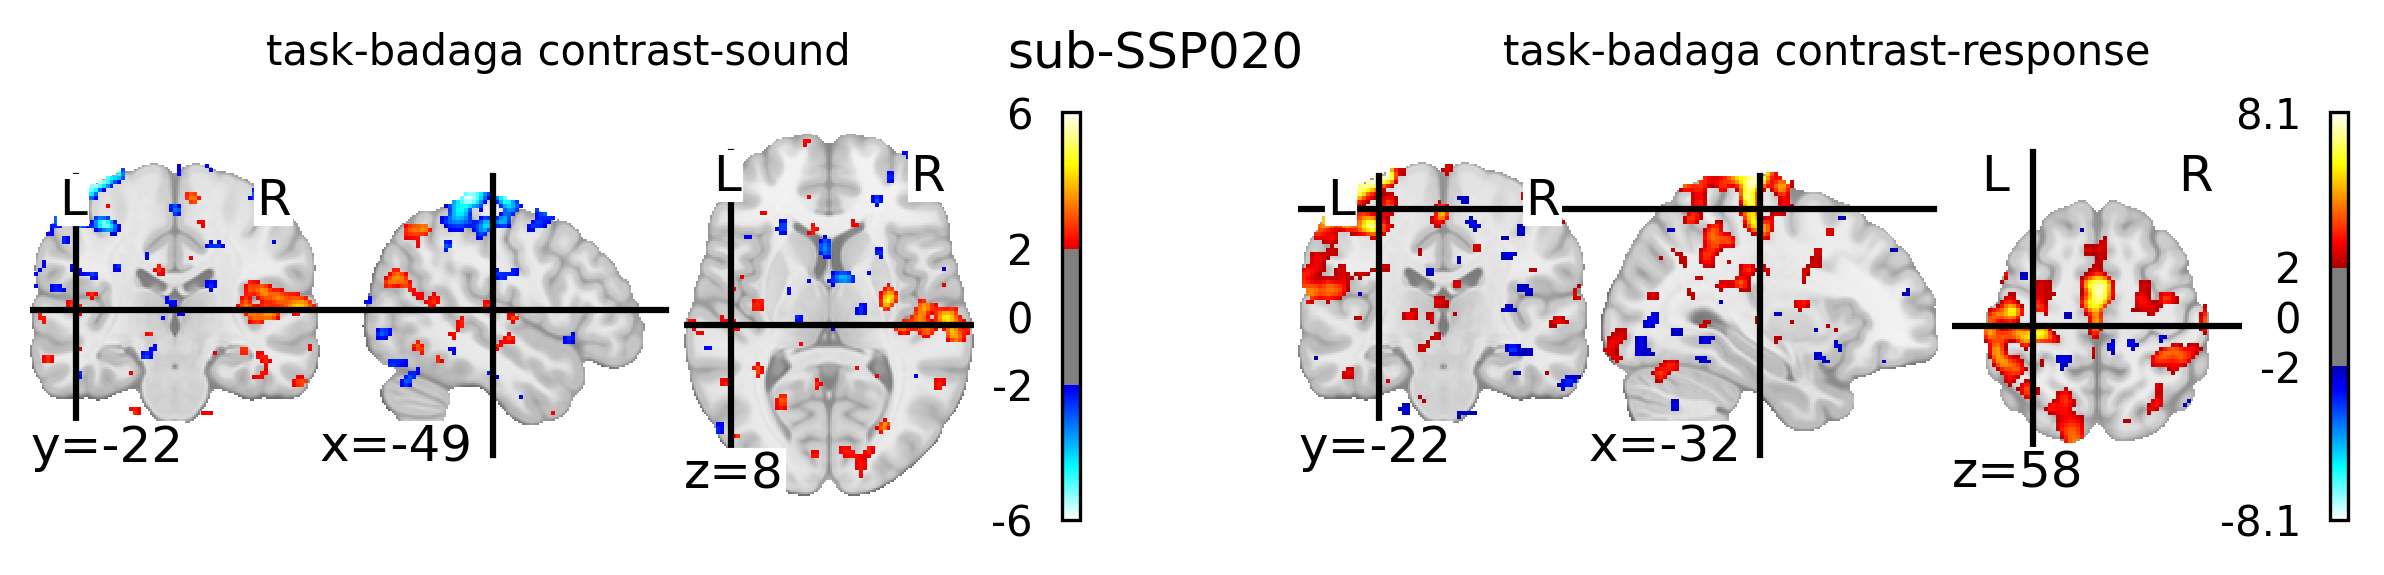

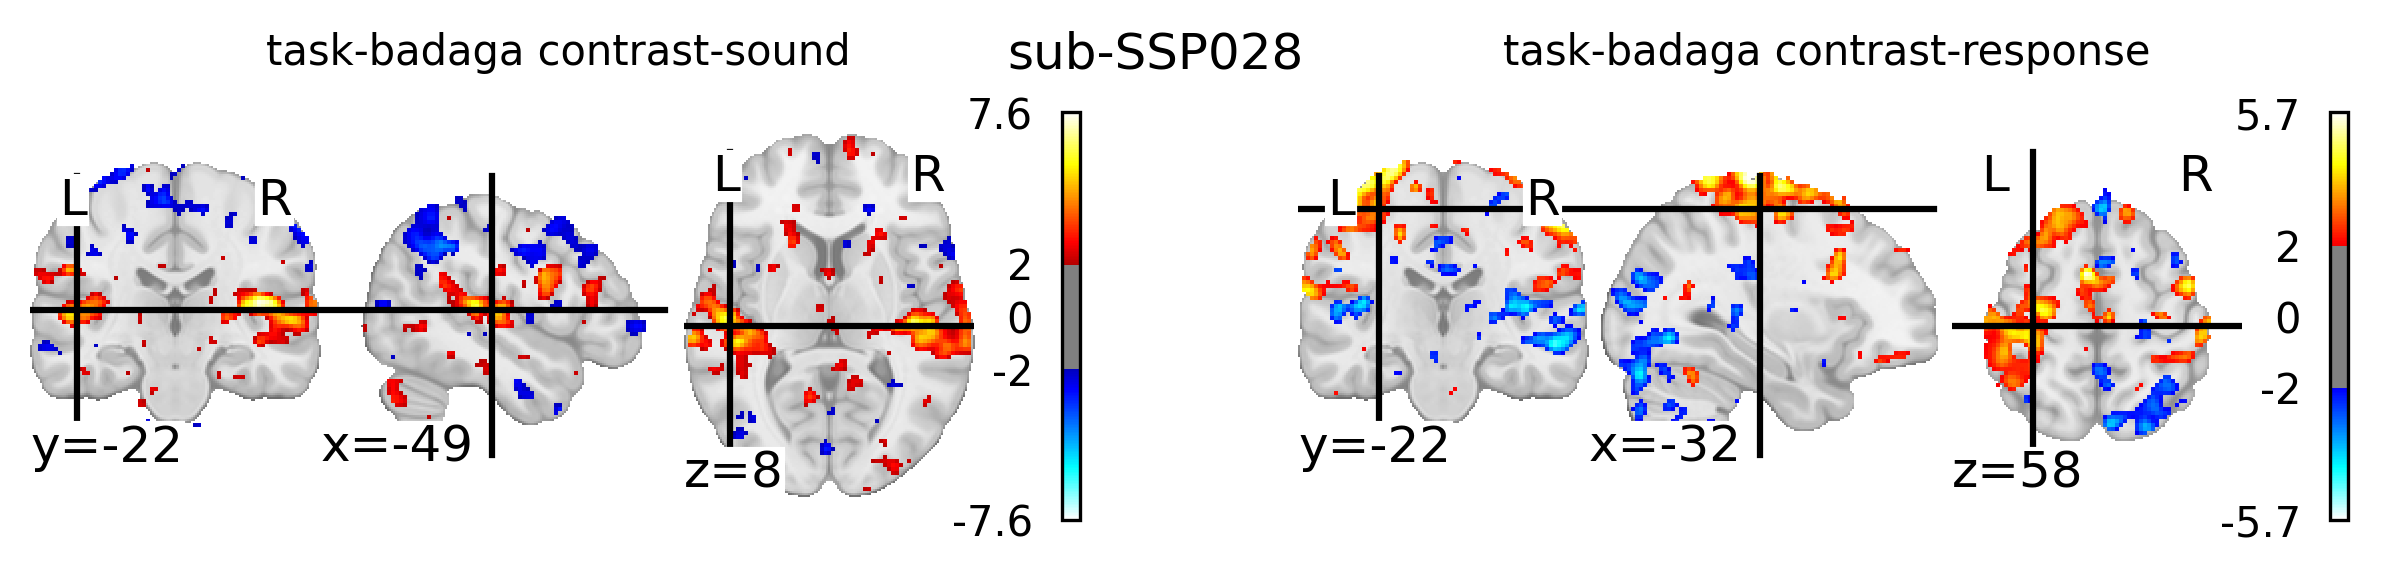

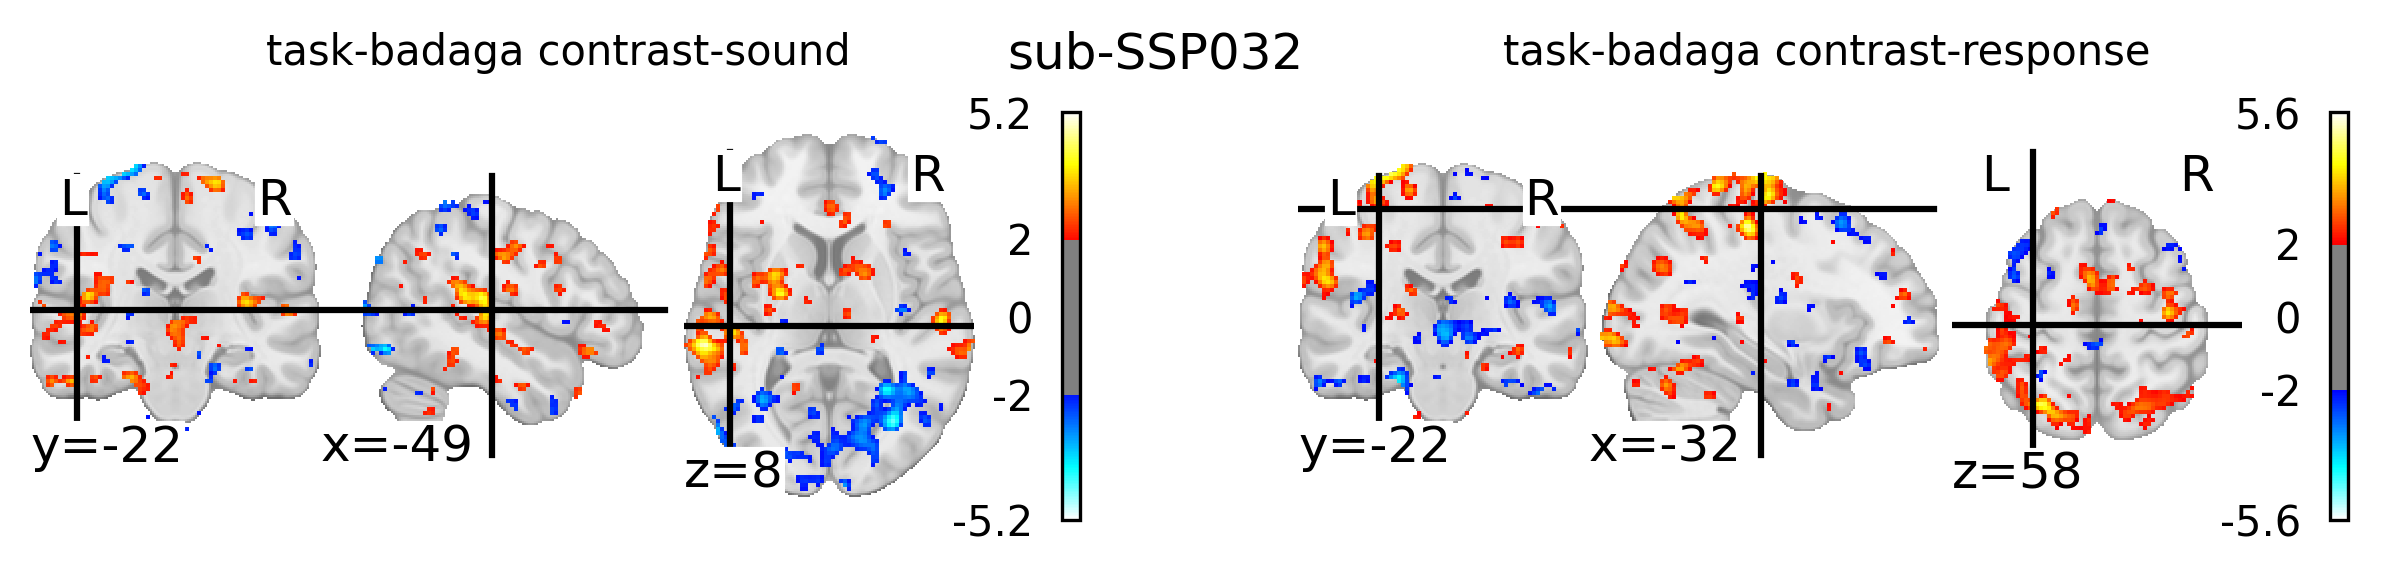

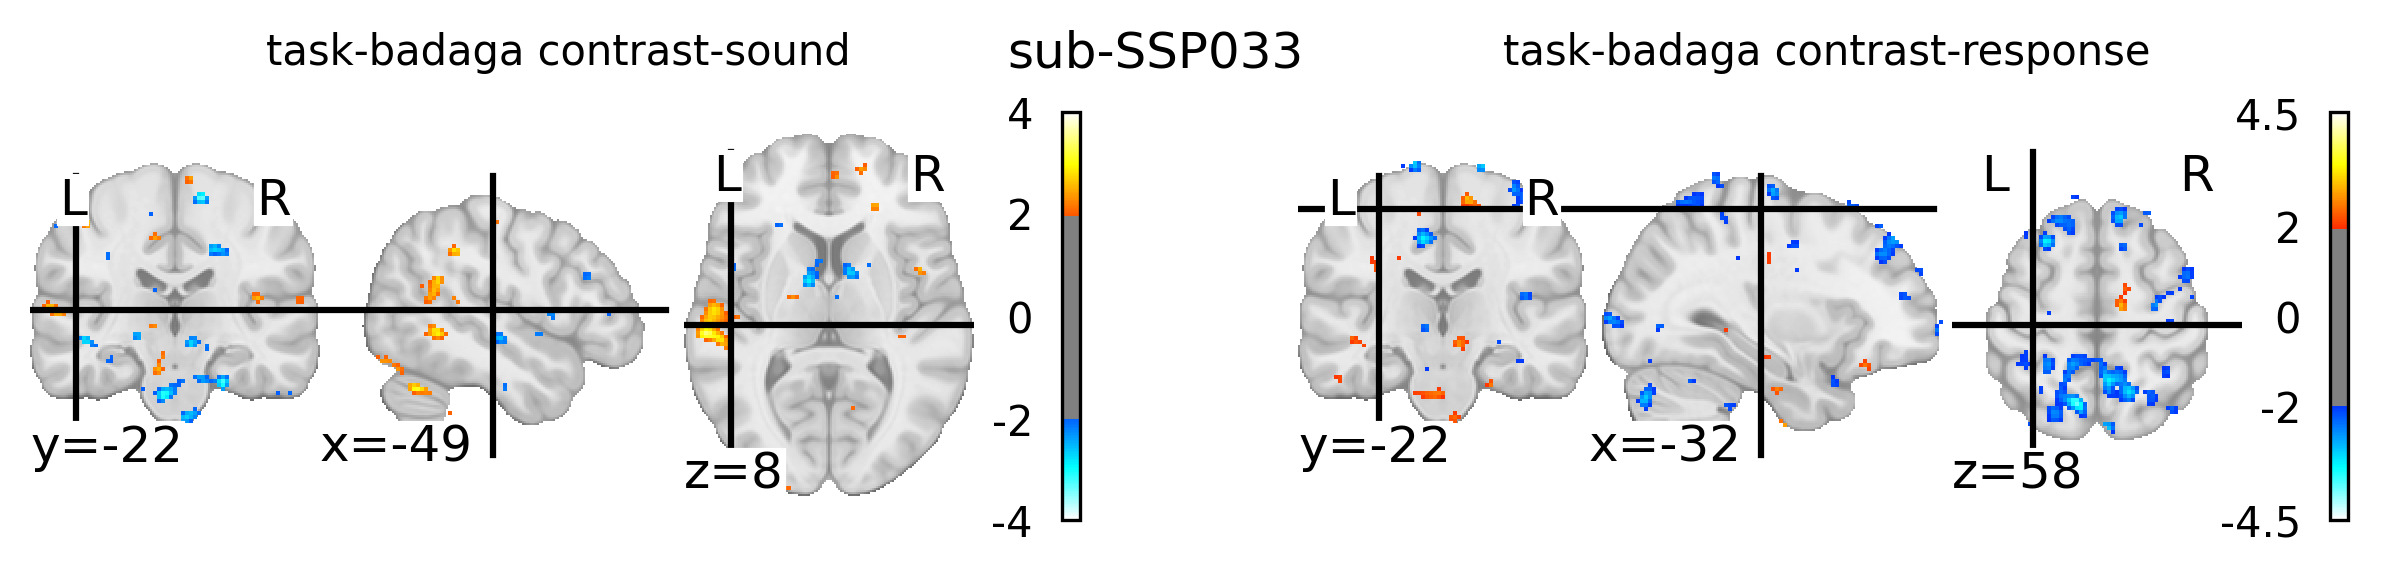

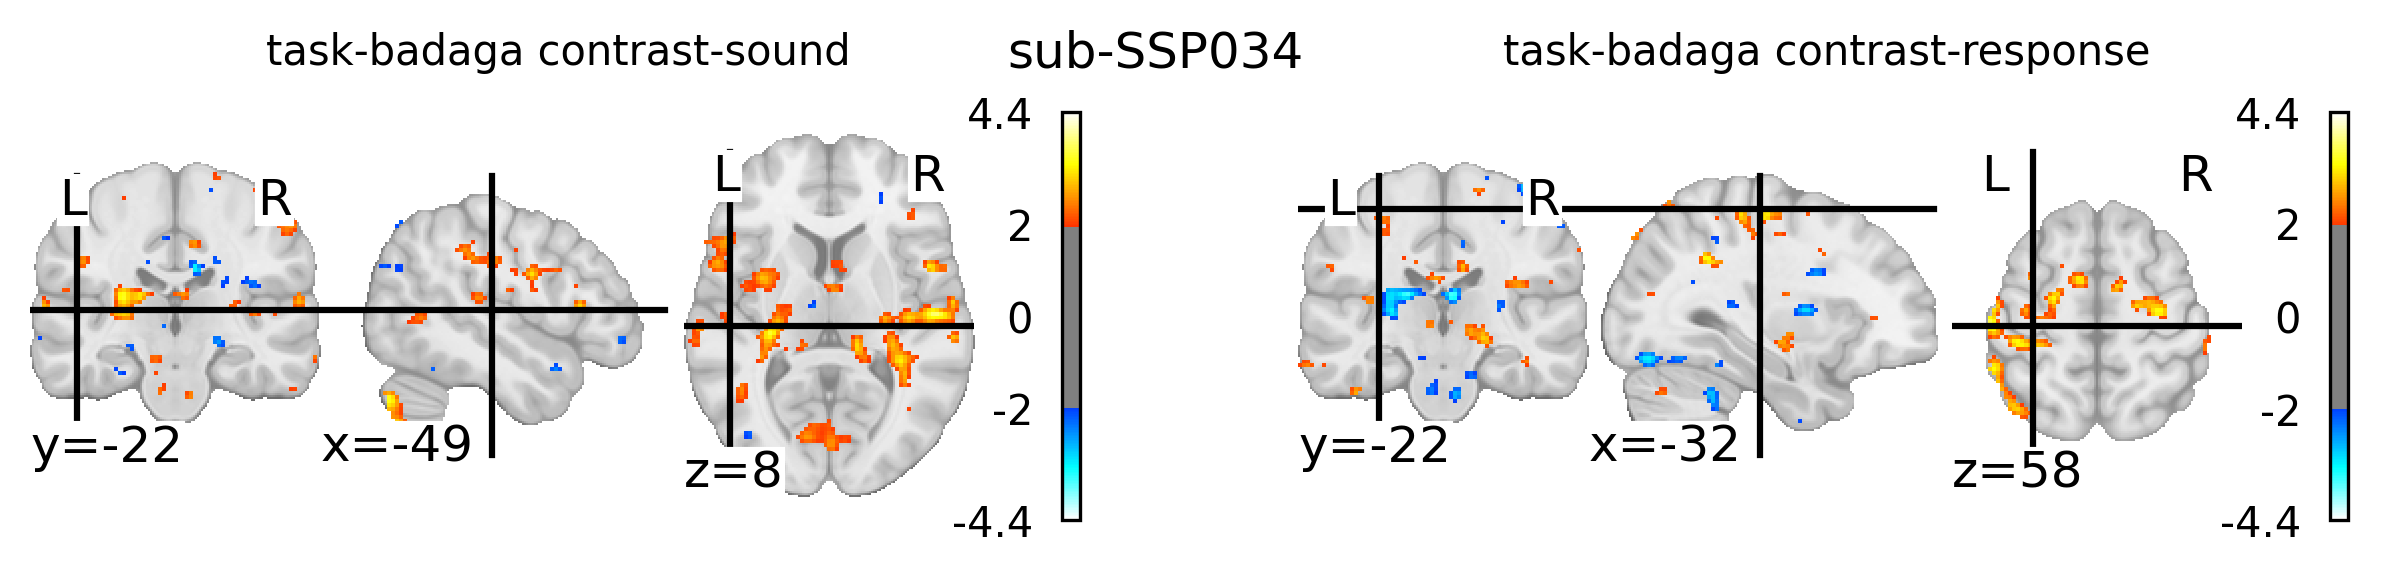

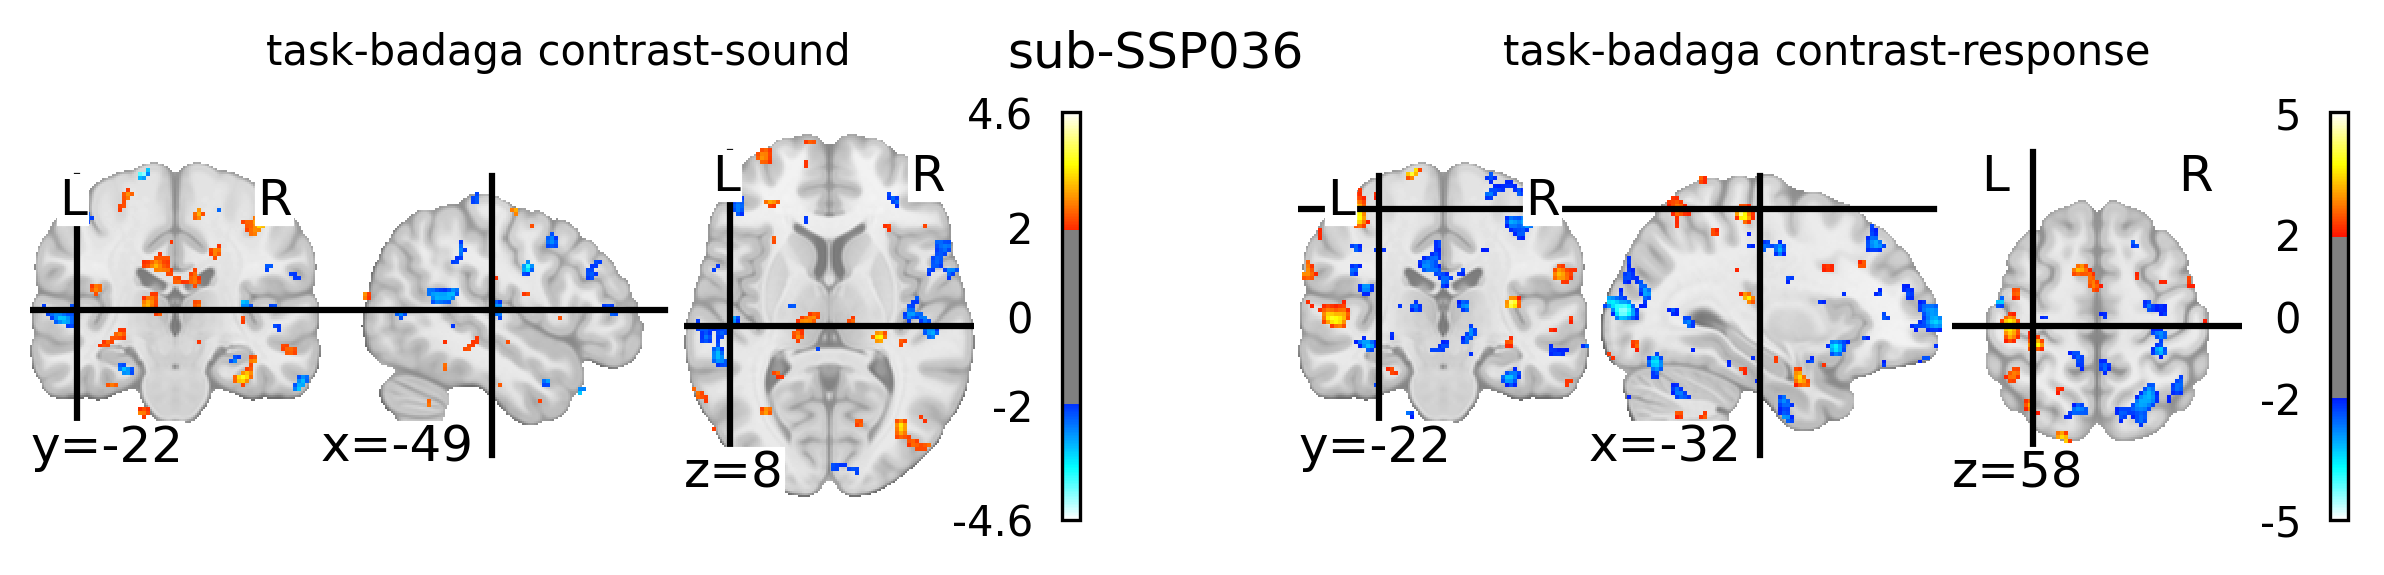

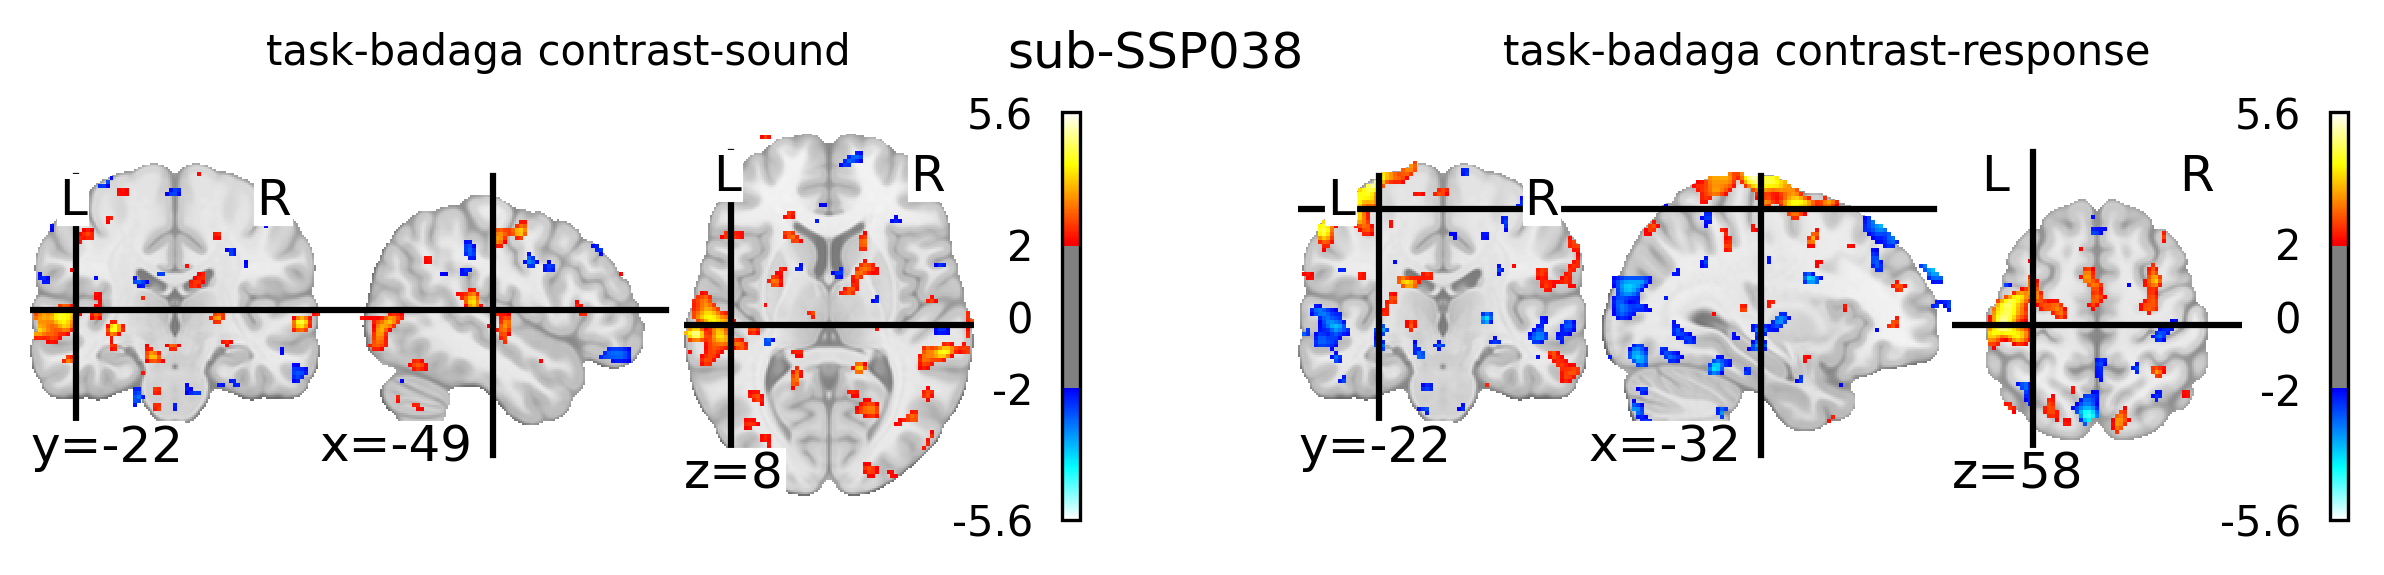

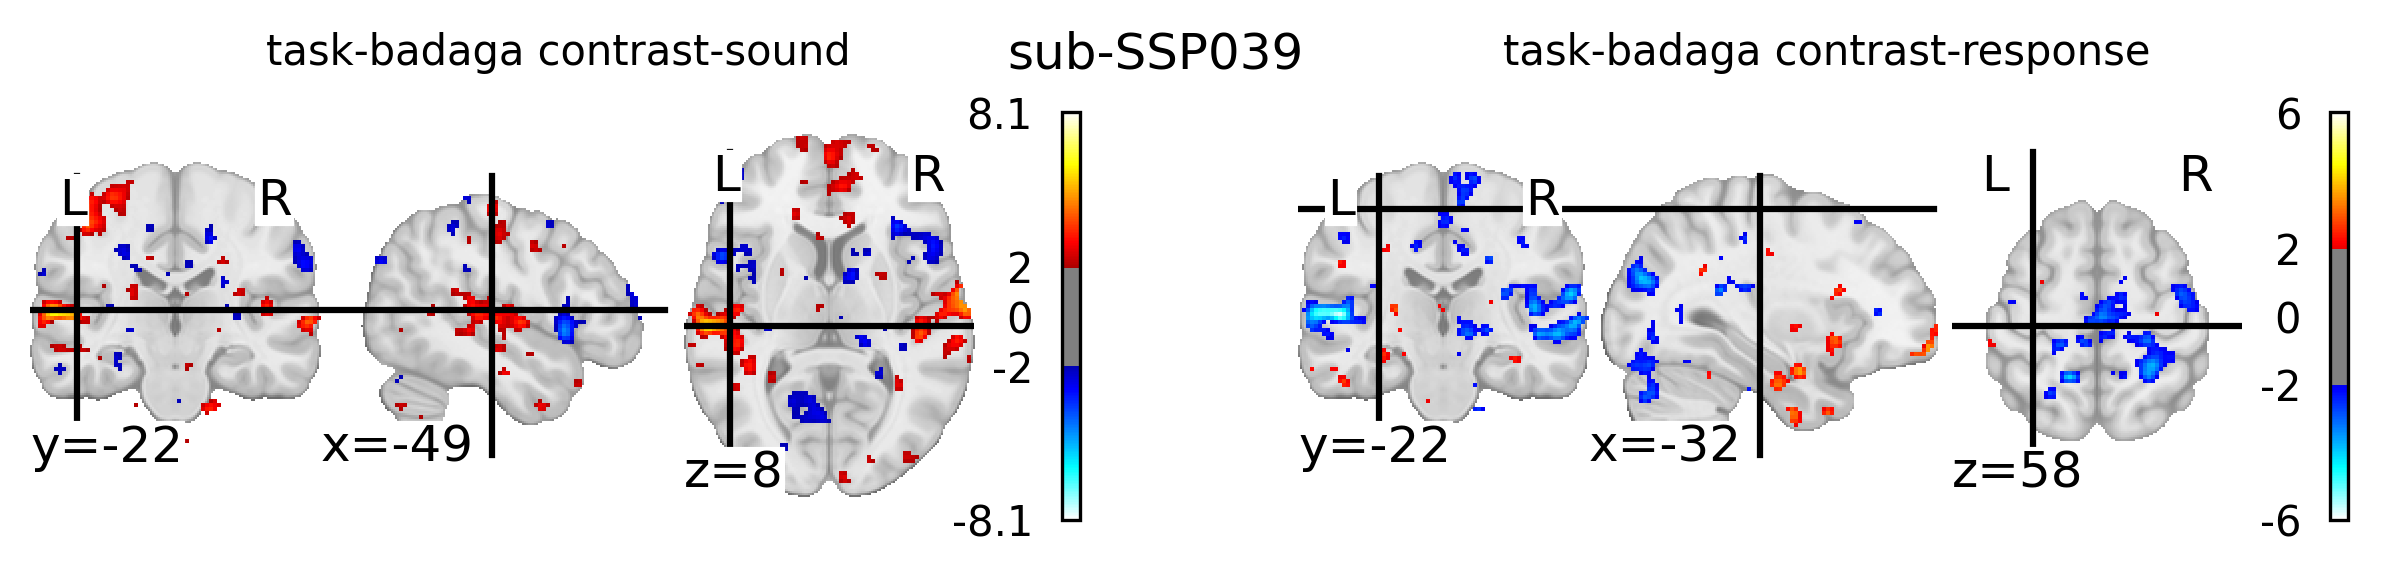

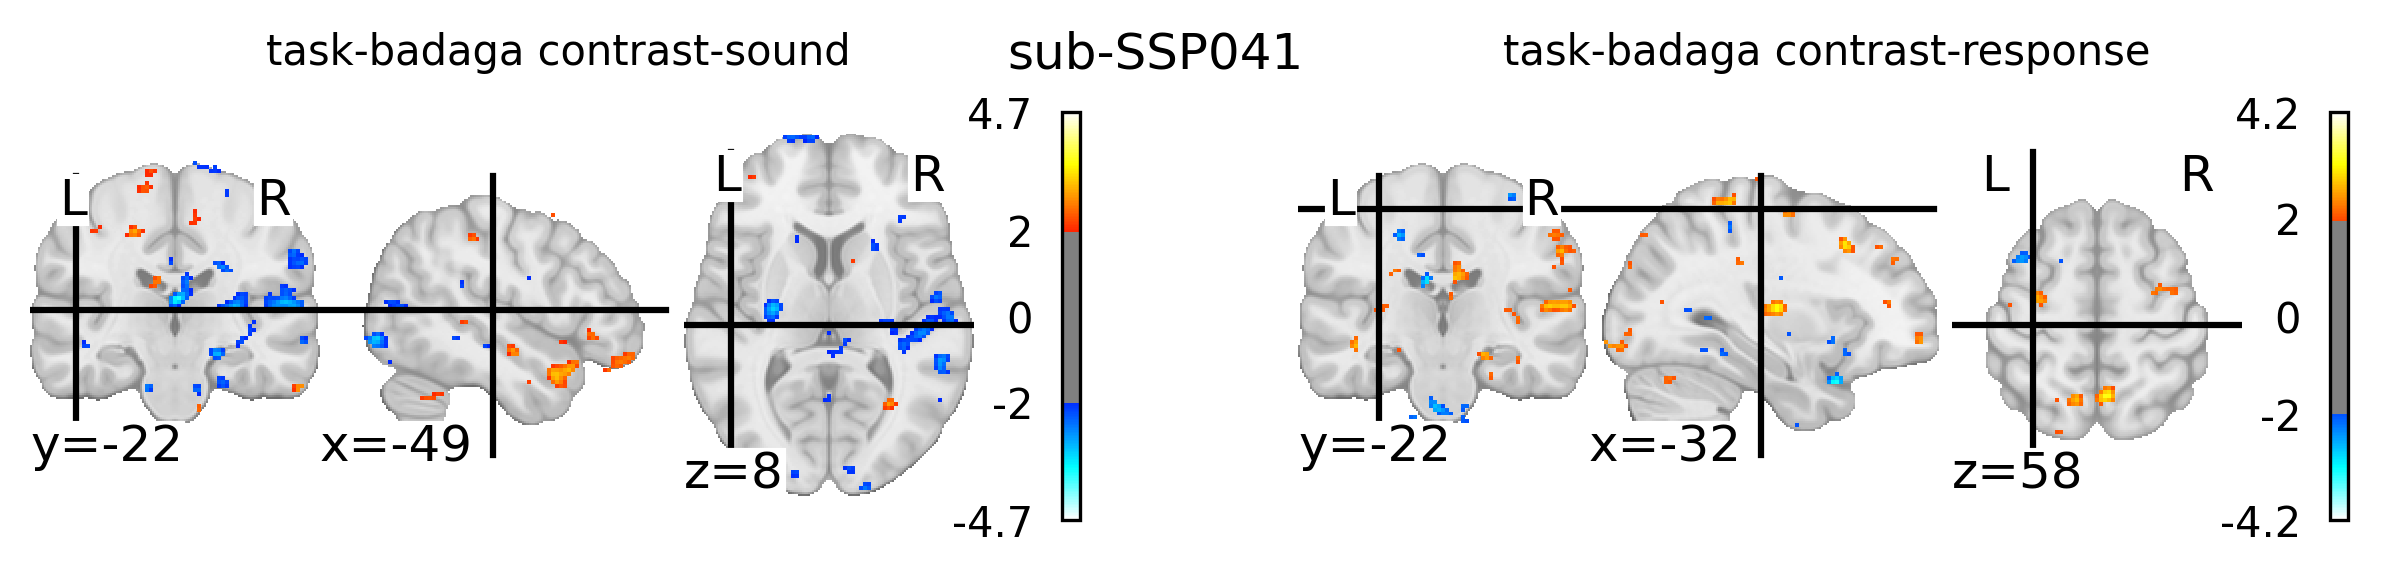

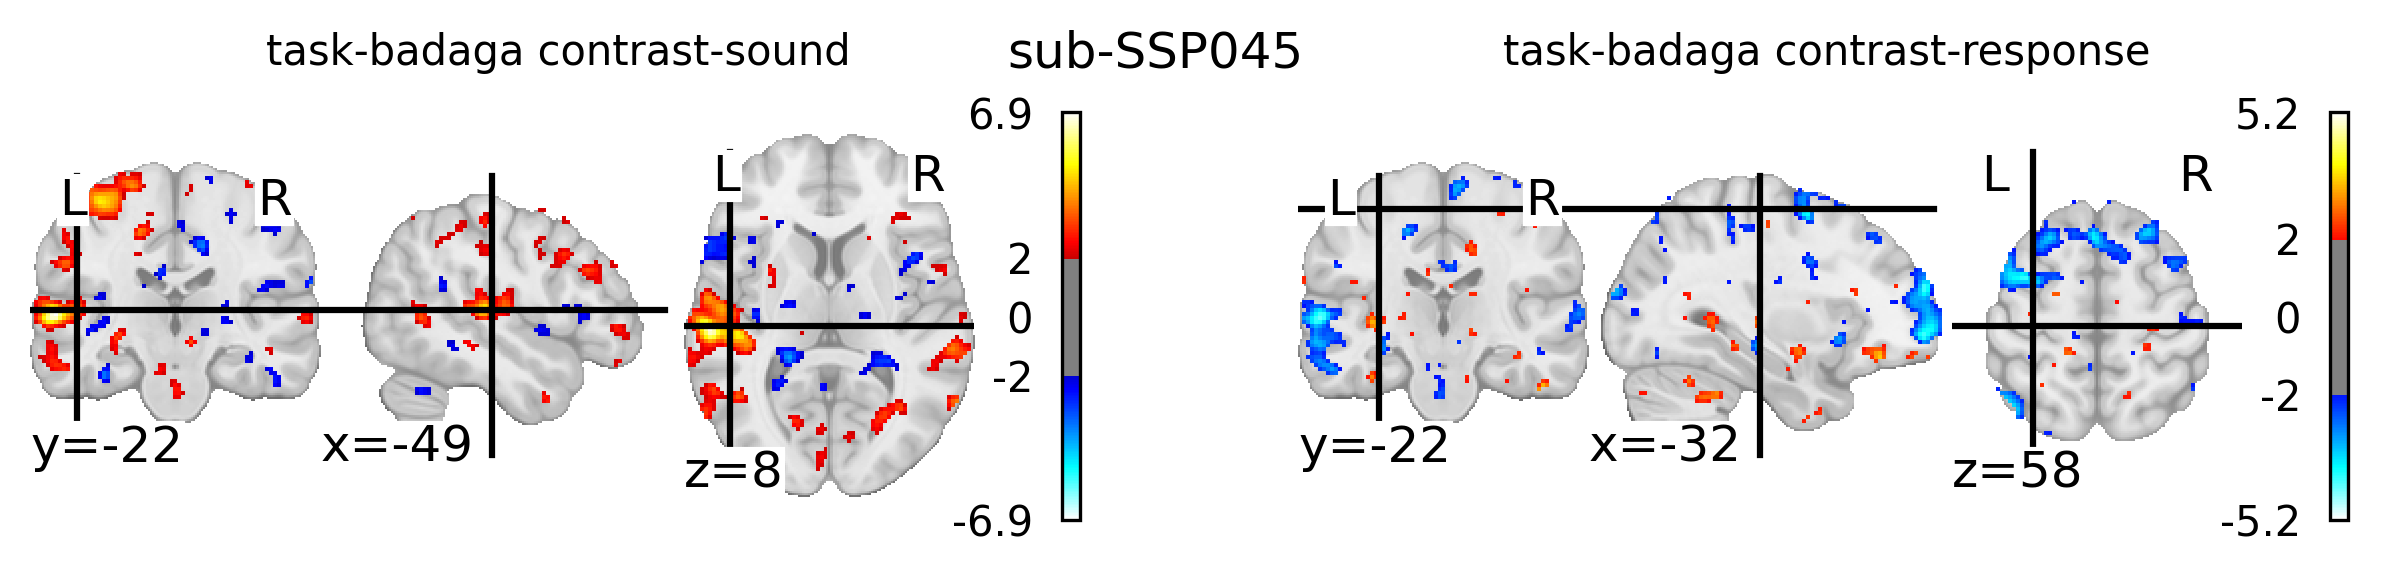

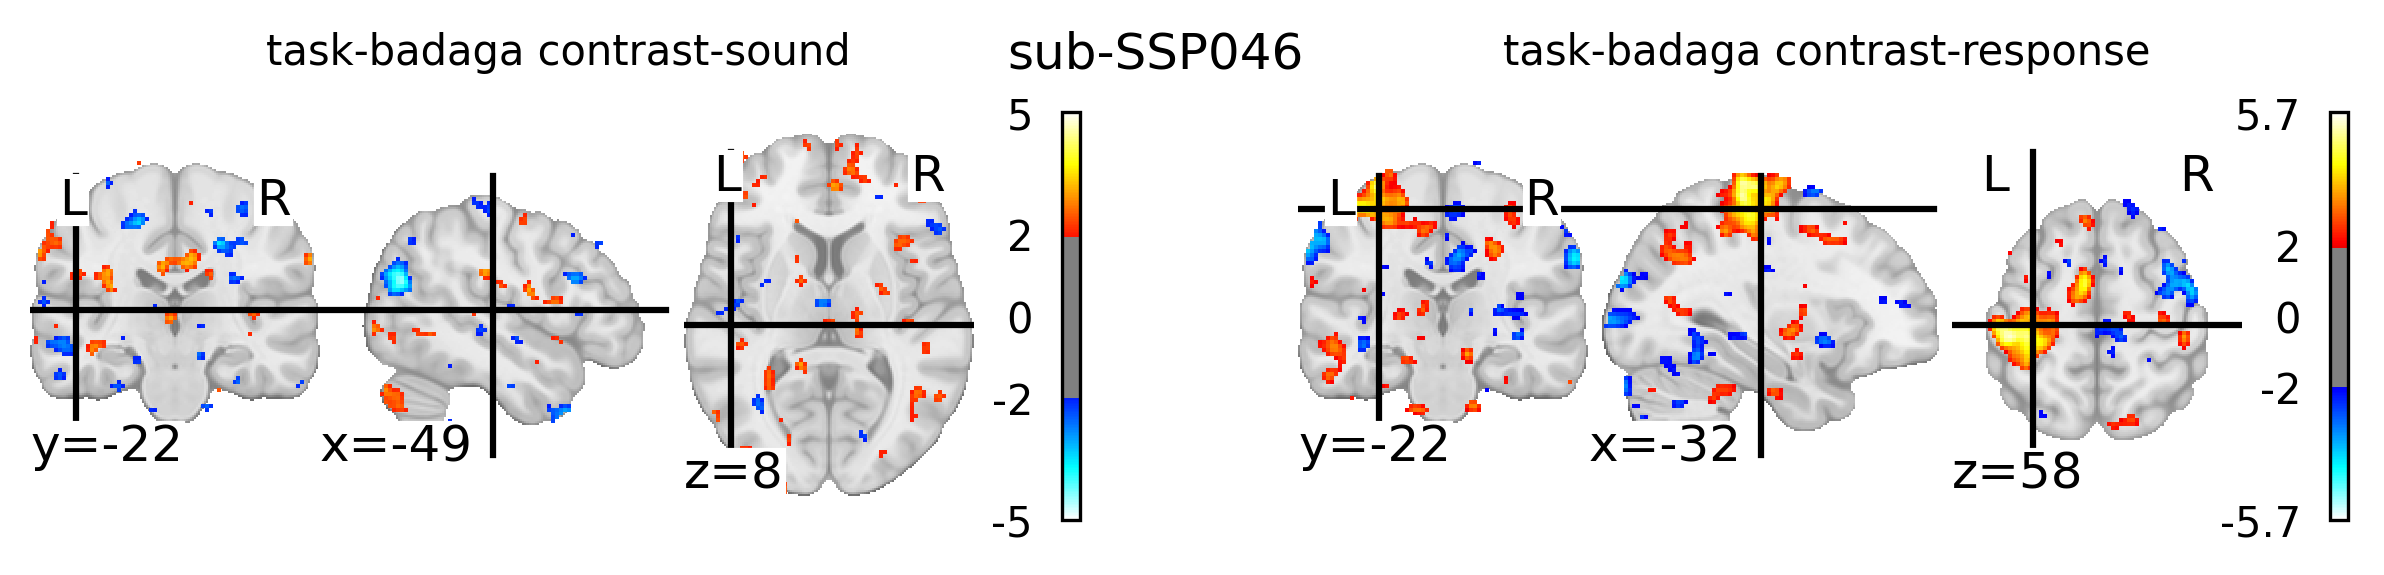

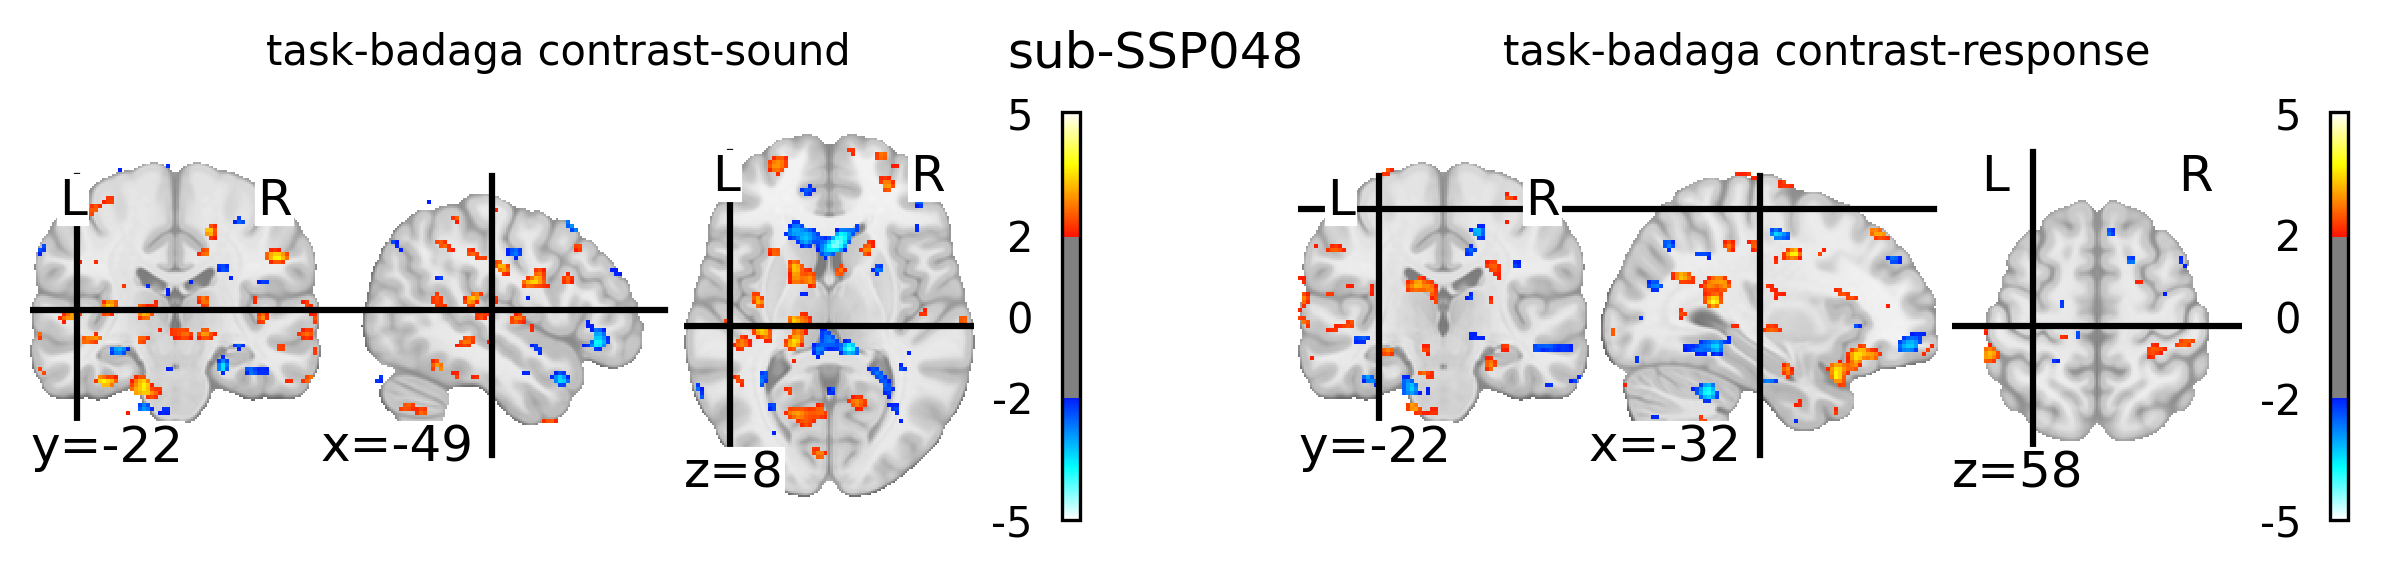

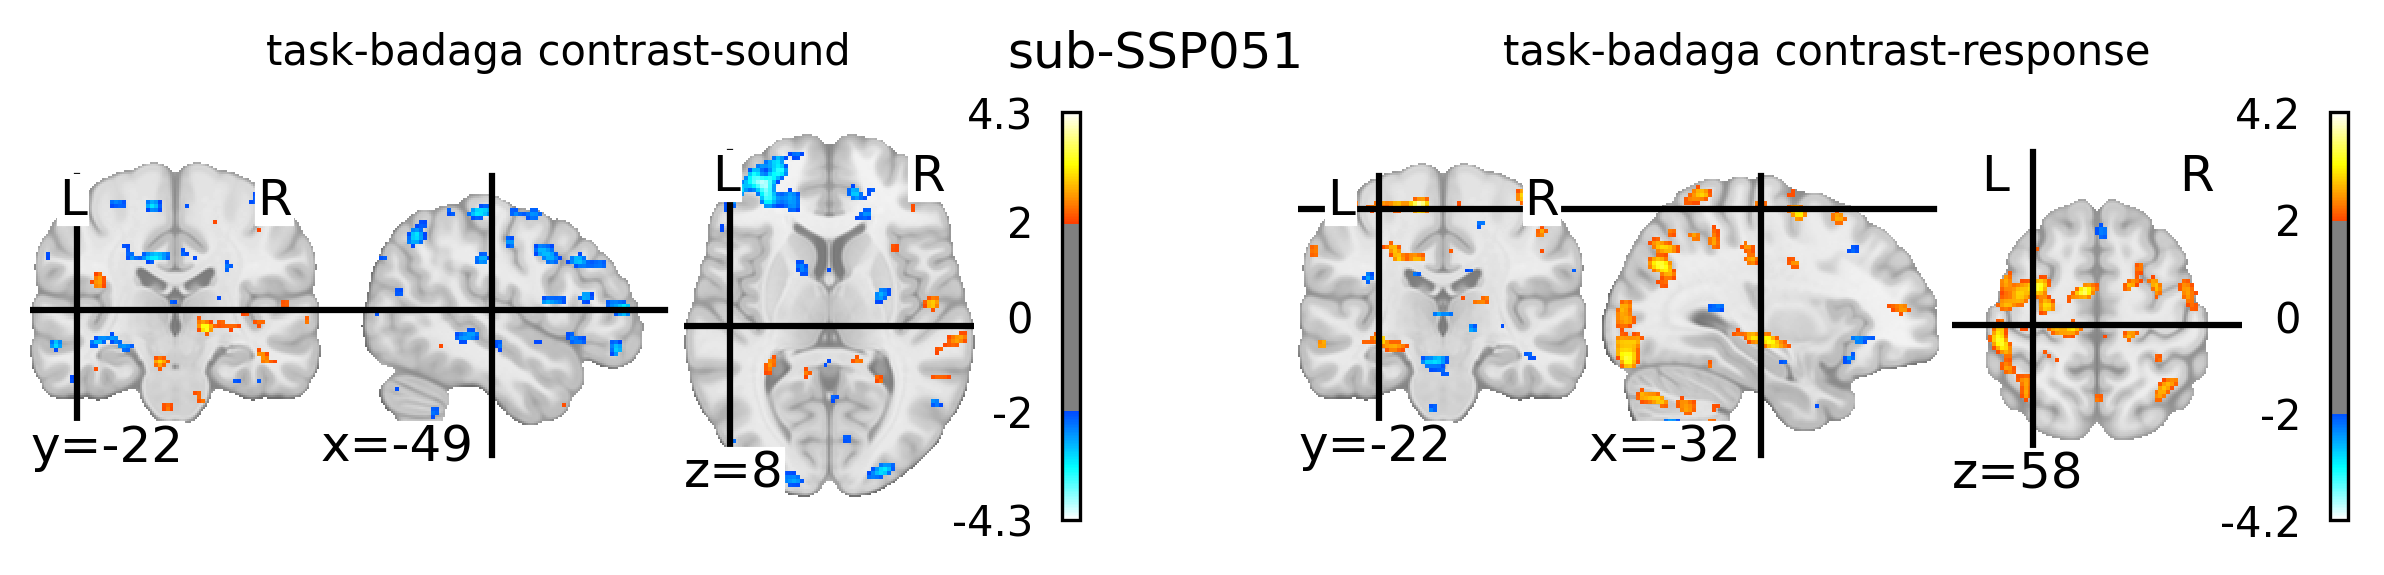

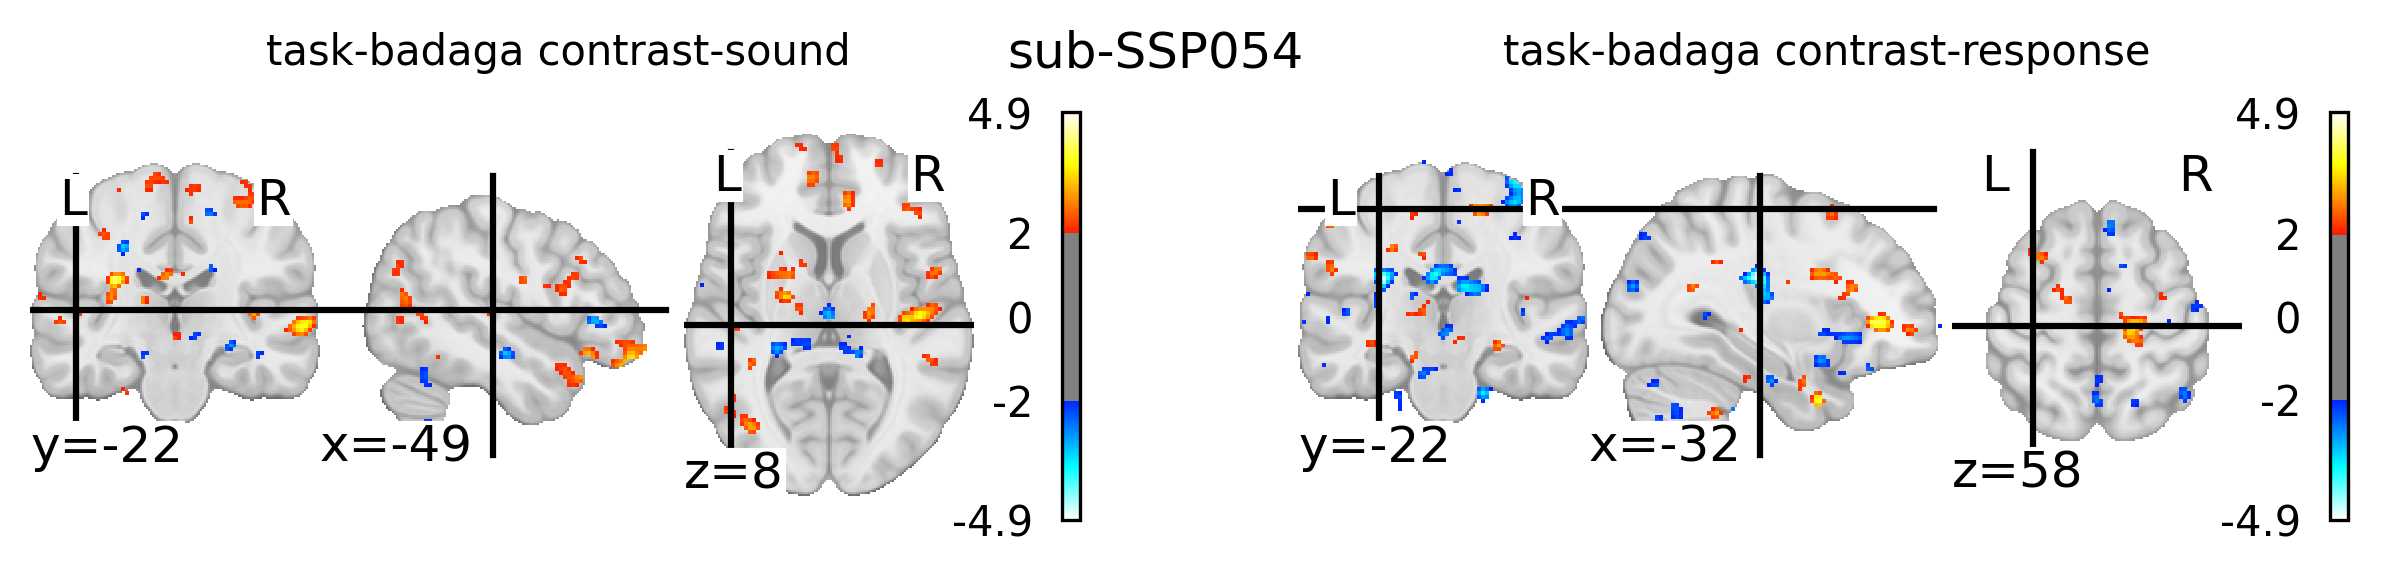

In [79]:
contrast_list = ['sound', 'response']

cut_coords = {'sound':    [-49, -22, 8],
              'response': [-32, -22, 58]}
for sub_id in sub_list:
    fig, axes = plt.subplots(1, 2, figsize=(10,2), dpi=300)
    fig.suptitle(sub_id, fontsize='large')
    
    for ci, contrast_label in enumerate(contrast_list):
        sub_con_fpath = os.path.join(l1_dir, sub_id,
                                 f'{sub_id}_task-{task_label}_fwhm-6_'+
                                 f'contrast-{contrast_label}_stat-z_statmap.nii.gz')

        sub_con_img = nib.load(sub_con_fpath)

        title=f'task-{task_label} contrast-{contrast_label}'
        plotting.plot_stat_map(sub_con_img, #thresholded_map, 
                               threshold=2., # threshold
                               bg_img=mni152_template,
                               cut_coords=cut_coords[contrast_label],
                               black_bg=False,
                               #title=title,
                               axes=axes[ci])
        axes[ci].set_title(title, fontsize='medium')
    #fig.tight_layout()
    fig.savefig(f'/ihome/bchandrasekaran/krs228/TEMP_data/SSP_fmri_task-badaga_first-level/'+
                f'{sub_id}_task-{task_label}.png')

In [74]:
ls /home

## One at a time with interactive plots

In [6]:
contrast_label = 'response' # 'sound'

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



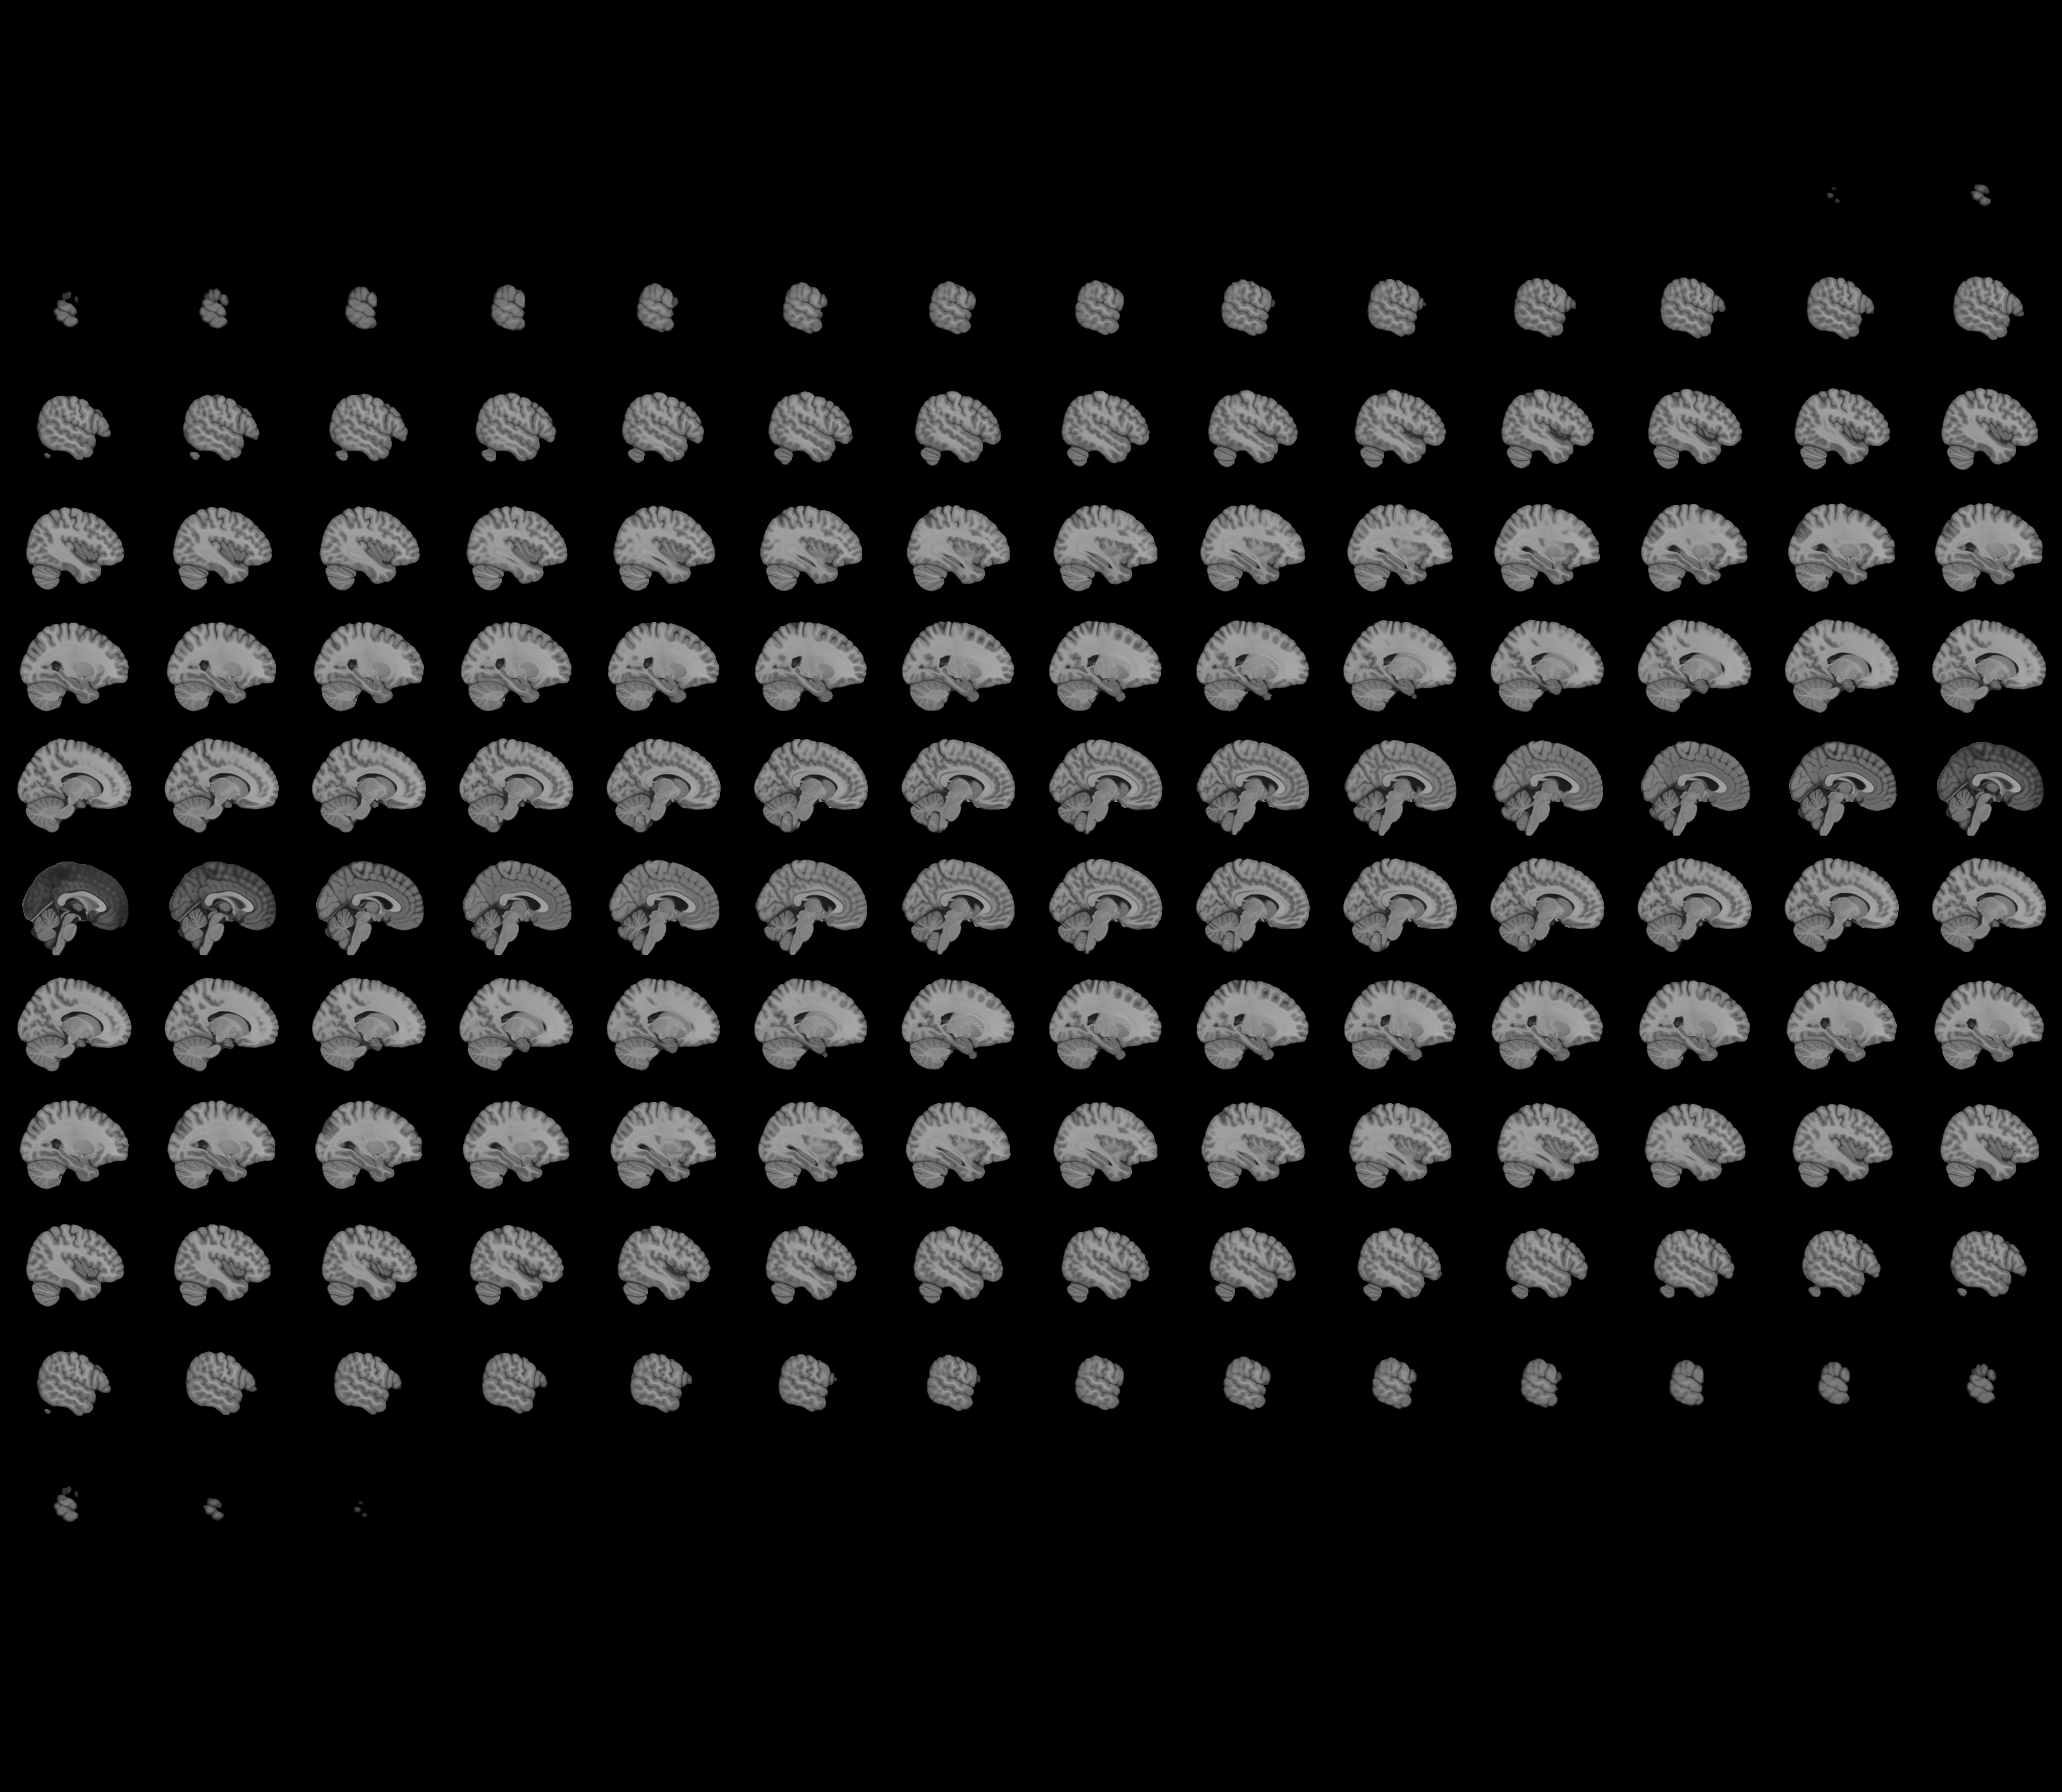
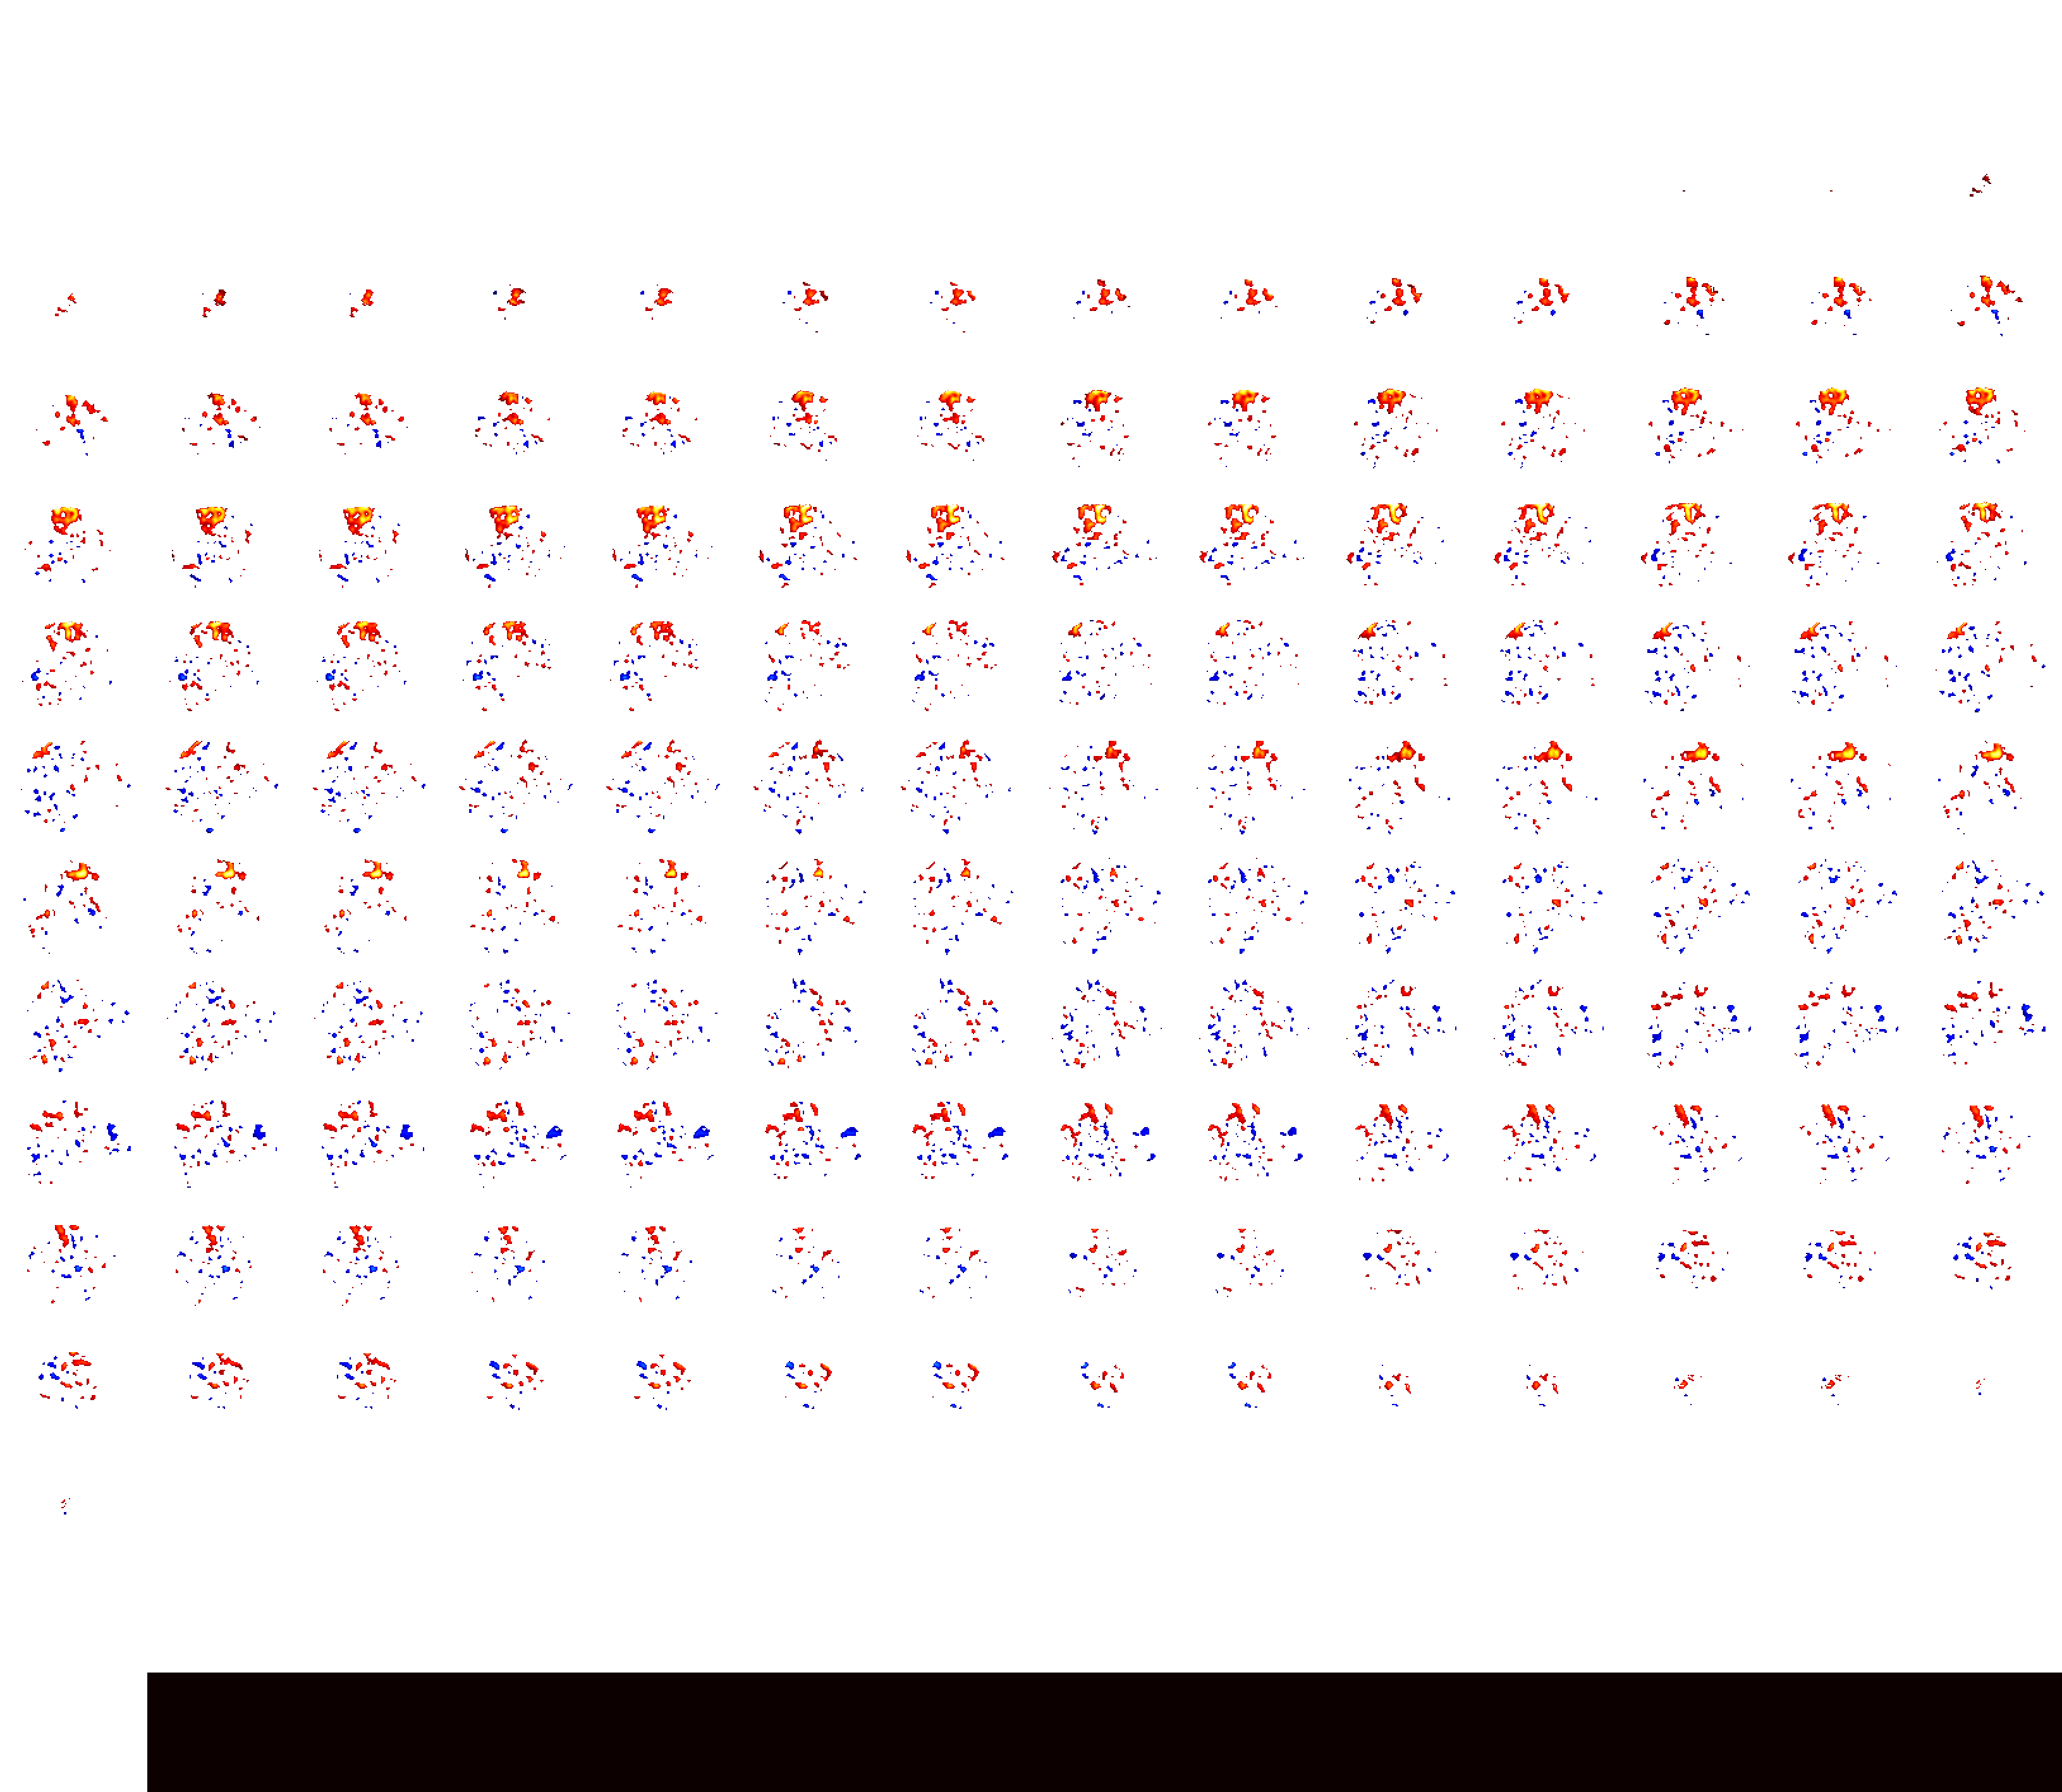

In [13]:
sub_id = sub_list[4]
sub_fpath = os.path.join(l1_dir, sub_id,
                         f'{sub_id}_task-{task_label}_fwhm-6_'+
                         f'contrast-{contrast_label}_stat-z_statmap.nii.gz')

sub_img = nib.load(sub_fpath)

title=f'{sub_id} {task_label} {contrast_label}'
plotting.view_img(sub_img, #thresholded_map, 
                  threshold=2., # threshold
                  bg_img=mni152_template,
                  cut_coords=[-32, -22, 58],
                  title=title)